In [2]:
import pandas as pd
df = pd.read_csv('Lesson/data/dulieuxettuyendaihoc.csv',
                 header=0,delimiter=',',encoding='utf-8')
df.head(10)

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
5,SV006,M,NaN,1,1.50,4.00,6.00,D1,12/7/2018,No
6,SV007,F,NaN,2,6.50,6.75,5.25,C,12/7/2018,Yes
7,SV008,F,NaN,2,3.75,4.50,4.25,D1,12/7/2018,Yes
8,SV009,F,NaN,1,3.50,3.50,6.75,D1,12/7/2018,Yes
9,SV0010,F,NaN,1,4.00,4.75,5.50,D1,12/7/2018,Yes


In [3]:
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
df.head(5)

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [4]:
dfKhoiC = df.loc[df['KT'] == 'C']
dfKhoiC['M1']

1     6.00
2     5.00
6     6.50
22    5.00
23    6.75
24    7.00
25    4.75
26    5.25
27    5.25
95    5.25
96    5.25
97    7.00
98    5.00
99    5.25
Name: M1, dtype: float64

In [5]:
dfKhoiC['M1'].describe()

count    14.000000
mean      5.660714
std       0.812209
min       4.750000
25%       5.062500
50%       5.250000
75%       6.375000
max       7.000000
Name: M1, dtype: float64

In [10]:
import scipy.stats as stats
print(stats.ttest_1samp(dfKhoiC['M1'], popmean=4.0))

if stats.ttest_1samp(dfKhoiC['M1'], popmean=4.0).pvalue > 0.05:
    print("Khong phu thuoc")
else:
    print("Phu thuoc")


Ttest_1sampResult(statistic=7.650519779016341, pvalue=3.6339826927369557e-06)
Phu thuoc


# Bài tập: Sinh viên kiểm tra xem điểm trung bình của môn thi M2 của khối thi C có bằng 5.7 hay không

In [10]:
stats.ttest_1samp(df[df['KT'] == 'C']['M1'], 5.7)
# pvalue=0.8591743243227866 > aplha=0.05
# p-value > 0.05 => không có bằng chứng để bác bỏ giả thuyết H0 
# => giả thuyết H0 được chấp nhận
# H0: M1 = 5.7

Ttest_1sampResult(statistic=-0.1809800377831837, pvalue=0.8591743243227866)

# Bài tập: Sinh viên về tự tìm hiểu cách thiết lập mức tin cậy hoặc sai lầm

## Hướng dẫn:
; 1. Tìm hiểu về khái niệm mức tin cậy (confidence level) và sai lầm (error) trong thống kê.
; 2. Hiểu rõ cách thiết lập mức tin cậy và mức sai lầm trong các bài kiểm tra giả thuyết.
; 3. Áp dụng kiến thức đã học để thiết lập mức tin cậy và mức sai lầm cho các bài kiểm tra thống kê trong dữ liệu đã cho.

## Gợi ý:
; - Mức tin cậy thường được thiết lập là 95% hoặc 99%.
; - Mức sai lầm (alpha) thường được thiết lập là 0.05 hoặc 0.01.
; - Sử dụng các hàm thống kê trong thư viện `scipy.stats` để thực hiện các bài kiểm tra giả thuyết với mức tin cậy và mức sai lầm đã thiết lập.

In [11]:
#Hãy kiểm tra xem có phải điểm trung bình M3
# của thí sinh thi khối C có là 6.5 hay không
# với mức sai lầm là 10%esis: The mean of M3 is equal to 6.5")
alpha = 0.1
stats.ttest_1samp(dfKhoiC['M3'], popmean=6.5)

Ttest_1sampResult(statistic=-7.186743391518831, pvalue=7.084381773314355e-06)

In [12]:
from statsmodels.stats.weightstats import ztest as ztest

ztest(df['M1'], value=8.0)


(-29.907152266677993, 1.588509177330612e-196)

In [13]:
#Bài tập: Hãy kiểm tra xem trung bình M2 có bằng 6.7
alpha = 0.05
stats.ttest_1samp(df['M2'], popmean=6.7)

Ttest_1sampResult(statistic=-23.064886971086832, pvalue=1.3248050047438612e-41)

In [14]:
dfKhoiC = df.loc[df['KT'] == 'C']
stats.ttest_ind(dfKhoiC['M1'], dfKhoiC['M2'], equal_var=True)

Ttest_indResult(statistic=2.5331368604654054, pvalue=0.017676922552296807)

In [19]:
# Bài tập: 
# Suy diễn xem trung bình M1 có bằng trung bình M3 cho
# thí sinh thi khối C hay không với mức tin cậy 95%
alpha = 1 - 0.95
# rel so sánh 2 mẫu độc lập trung bình
result = stats.ttest_rel(dfKhoiC['M1'], dfKhoiC['M3'])
if result.pvalue < alpha:
    print("Bác bỏ giả thuyết không: Trung bình M1 không bằng trung bình M3")
else:
    print("Không bác bỏ giả thuyết không: Trung bình M1 bằng trung bình M3")



Bác bỏ giả thuyết không: Trung bình M1 không bằng trung bình M3


In [20]:
ztest(df['M1'], df['M2'], value=0)

(-2.9004757923795, 0.0037259661678783573)

In [24]:
# Bài tập: Kiểm tra trung bình M2 và M3 có bằng nhau không
# với mức tin cậy 95%alpha = 0.05
stats.ttest_rel(df['M2'], df['M3'])

Ttest_relResult(statistic=-3.9940221931879734, pvalue=0.00012493547596807863)

In [25]:
from scipy.stats.stats import pearsonr

pearsonr là một hàm trong thư viện scipy.stats của Python, được sử dụng để tính hệ số tương quan Pearson giữa hai tập dữ liệu. Hệ số tương quan Pearson đo lường mức độ tương quan tuyến tính giữa hai biến. Giá trị của nó nằm trong khoảng từ -1 đến 1, trong đó:

1: Hai biến có mối tương quan tuyến tính dương hoàn hảo.
-1: Hai biến có mối tương quan tuyến tính âm hoàn hảo.
0: Không có mối tương quan tuyến tính giữa hai biến.

In [26]:
pearsonr(df['M1'], df['M2'])

(0.035154057257850264, 0.7284198928723655)

In [27]:
# Bài tập: Sinh viên làm tương tự cho M1 và M3 có tương quan hay không?
pearsonr(df['M1'], df['M3'])

(0.018730760164383096, 0.853253434705495)

In [29]:
# Bài tập: Sinh viên làm tương tự cho M2 và M3 có tương quan hay không?
pearsonr(df['M2'], df['M3'])

(-0.09152288755408221, 0.36513447674961585)

In [33]:
crosdata = pd.crosstab(df['GT'], [df['NGHE']], rownames=['GT'], colnames=['NGHE'])
crosdata

NGHE,No,Yes
GT,,
F,23,25
M,32,20


In [35]:
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 0.575
p_value is : 0.22763927303454323



This line calls the fisher_exact function from the stats module (likely from scipy.stats).
fisher_exact performs Fisher's Exact Test, which is used to determine if there are nonrandom associations between two categorical variables.
crosdata is expected to be a 2x2 contingency table (a matrix of counts).
The function returns two values:
odd_ratio: The odds ratio calculated from the contingency table.
p_value: The p-value for the test, indicating the significance of the association.

In [36]:
from scipy.stats import chi2_contingency

In [37]:
crosdata = pd.crosstab(df['KV'], [df['KT']], rownames=['KV'], colnames=['KT'])
crosdata

KT,A,A1,B,C,D1
KV,,,,,
1,29,2,8,8,13
2,9,0,0,2,8
2NT,11,4,1,4,1


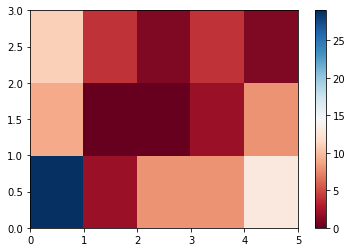

In [39]:
import matplotlib.pyplot as plt
plt.pcolor(crosdata,cmap='RdBu')
plt.colorbar()
plt.show()

In [40]:
stat, p, dof, expected = chi2_contingency(crosdata)

The chi2_contingency function in Python is used to perform a Chi-square test of independence. This test is used to determine if there is a significant association between two categorical variables. The function is part of the scipy.stats module.

Here's a step-by-step explanation of how to use chi2_contingency:

Import the necessary module: You need to import the chi2_contingency function from the scipy.stats module.

Prepare your data: The data should be in the form of a contingency table (a 2D array), where each cell represents the frequency count of occurrences for the combination of the two categorical variables.

Perform the test: Call the chi2_contingency function with the contingency table as the argument. The function will return four values: the Chi-square statistic, the p-value, the degrees of freedom, and the expected frequencies.

In [41]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 0.02012461887796485
Dependent (reject H0)


In [42]:
# Bài tập: GT và KT có mối quan hệ hay không?
# Create a contingency table for GT and KT
contingency_table = pd.crosstab(df['GT'], df['KT'])

# Perform the Chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Determine if we reject the null hypothesis
if p_val <= alpha:
    print("Dependent (reject H0): There is a relationship between GT and KT")
else:
    print("Independent (H0 holds true): There is no relationship between GT and KT")

Chi2 Stat: 14.84003760789475
P-Value: 0.005044752209452435
Degrees of Freedom: 4
Expected Frequencies:
[[23.52  2.88  4.32  6.72 10.56]
 [25.48  3.12  4.68  7.28 11.44]]
Dependent (reject H0): There is a relationship between GT and KT


In [43]:
# Bài tập: GT và KT có mối quan hệ hay không?
contingency_table = pd.crosstab(df['KV'], df['KT'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

if p_val <= alpha:
    print("Dependent (reject H0): There is a relationship between KV and KT")
else:
    print("Independent (H0 holds true): There is no relationship between KV and KT")

Dependent (reject H0): There is a relationship between KV and KT


In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [45]:
model = ols('M1 ~ GT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
GT,1.0,1.203141,1.203141,0.590538,0.444059
Residual,98.0,199.661859,2.037366,NaN,NaN


Explanation
Ordinary Least Squares (OLS) Regression:

ols('M1 ~ GT', data=df): This line specifies an OLS regression model where M1 is the dependent variable and GT is the independent variable. The data=df argument indicates that the data for these variables is contained in the DataFrame df.
.fit(): This method fits the OLS model to the data, estimating the coefficients for the regression equation.
ANOVA Table:

sm.stats.anova_lm(model, typ=1): This function performs an Analysis of Variance (ANOVA) on the fitted OLS model. The typ=1 argument specifies the type of sums of squares to use (Type I in this case).
aov_table: This variable stores the resulting ANOVA table, which includes information such as the sum of squares, degrees of freedom, F-statistic, and p-value for the model terms.
ANOVA Table
The ANOVA table helps in understanding the significance of the independent variables in explaining the variability of the dependent variable. It typically includes the following columns:

Sum of Squares (SS): Measures the variability explained by the model and the residuals.
Degrees of Freedom (df): The number of independent values that can vary in the calculation.
Mean Square (MS): The average of the sum of squares (SS divided by df).
F-statistic: A ratio of the model mean square to the residual mean square, used to determine the significance of the model.
p-value: Indicates the probability that the observed F-statistic would occur by chance. A low p-value suggests that the model terms are significant.
Example
Here's an example of how the ANOVA table might look:

Source	SS	df	MS	F	p-value
GT	123.45	1	123.45	10.23	0.002
Residual	567.89	98	5.79		
Total	691.34	99			
This table indicates that the independent variable GT is statistically significant in explaining the variability in M1.

In [53]:
# Bài tập: Điểm M2 có phụ thuộc vào khu vực hay không
alpha = 0.05
model = ols('M2 ~ KV', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
KV,2.0,6.053398,3.026699,2.790934,0.066299
Residual,97.0,105.194102,1.084475,NaN,NaN


In [54]:
# Perform ANOVA test to check if M2 scores depend on the region (KV)
model = ols('M2 ~ KV', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
print(aov_table)

# Determine if we reject the null hypothesis
if aov_table['PR(>F)'][0] <= alpha:
    print("Dependent (reject H0): M2 scores depend on the region (KV)")
else:
    print("Independent (H0 holds true): M2 scores do not depend on the region (KV)")

            df      sum_sq   mean_sq         F    PR(>F)
KV         2.0    6.053398  3.026699  2.790934  0.066299
Residual  97.0  105.194102  1.084475       NaN       NaN
Independent (H0 holds true): M2 scores do not depend on the region (KV)


In [55]:
# Bài tập: Điểm M3 có phụ thuộc khối thi hay không
model = ols('M3 ~ KT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
print(aov_table)
if aov_table['PR(>F)'][0] <= alpha:
    print("Dependent (reject H0): M3 scores depend on the exam group (KT)")
else:
    print("Independent (H0 holds true): M3 scores do not depend on the exam group (KT)")

            df      sum_sq   mean_sq         F   PR(>F)
KT         4.0    3.967636  0.991909  0.911814  0.46041
Residual  95.0  103.344864  1.087841       NaN      NaN
Independent (H0 holds true): M3 scores do not depend on the exam group (KT)


In [57]:
model = ols('M1 ~ GT + KV + GT:KV',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)

            df      sum_sq   mean_sq         F    PR(>F)
GT         1.0    1.203141  1.203141  0.598960  0.440917
KV         2.0    3.493206  1.746603  0.869512  0.422500
GT:KV      2.0    7.349290  3.674645  1.829350  0.166186
Residual  94.0  188.819363  2.008717       NaN       NaN


In [59]:
# Bài tập: Phân tích xem M2 có phụ thuộc trên nhóm KV theo từng loại KT hay không
model = ols('M2 ~ KV + KT + KV:KT', data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)

if result['PR(>F)'][2] <= alpha:
    print("Dependent (reject H0): M2 scores depend on the region (KV) and exam group (KT)")
else:
    print("Independent (H0 holds true): M2 scores do not depend on the region (KV) and exam group (KT)")

            df     sum_sq   mean_sq         F    PR(>F)
KV         2.0   6.053398  3.026699  2.987203  0.055626
KT         4.0  10.061984  2.515496  2.482671  0.049539
KV:KT      8.0   8.688324  1.086040  1.071869  0.390293
Residual  87.0  88.150282  1.013222       NaN       NaN
Independent (H0 holds true): M2 scores do not depend on the region (KV) and exam group (KT)


In [60]:
X_with_constant = sm.add_constant(df[["M1"]].values)
y = df[['M3']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.03439
Date:                Mon, 13 Jan 2025   Prob (F-statistic):              0.853
Time:                        18:09:25   Log-Likelihood:                -145.41
No. Observations:                 100   AIC:                             294.8
Df Residuals:                      98   BIC:                             300.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8238      0.295     16.338      0.0

In [66]:
# New data point for prediction
new_data = np.array([[1, 6.7]])

# Predict the M3 score using the linear regression model
predicted_M3 = result.predict(new_data)

print(f"Dự báo điểm M3 cho thí sinh có điểm M1 = 6.7 là: {predicted_M3[0]}")
print(df['M3'].mean())
print(df['M1'].mean())

Dự báo điểm M3 cho thí sinh có điểm M1 = 6.7 là: 4.91552473054042
4.875
3.74
